### Importing all the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

Columns:
1. Age - Age of the primary beneficiary
2. Sex - Gender of the insurance contractor
3. BMI - Body mass index
4. Children - Number of children covered by health insurance per number of dependents
5. Smoker - Smoking Boolean True/False
6. Region - Northeast, southeast, southwest, northwest
7. Charges - Medical Cost/Charges

In [2]:
#import dataset 
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Exploratory Data Analysis

In [6]:
## Check for na values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no na values.

In [7]:
## check for duplicated values
df.duplicated().sum()

1

There are duplicate rows, hence it is important to remove the duplicated rows

In [8]:
df[df.duplicated(keep=False)] ## selecting rows with duplicated entries

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
df = df.drop_duplicates()
df.duplicated().sum() ## succesfully removed the duplicated entries

0

Text(0.5, 1.0, 'Distribution of Charges')

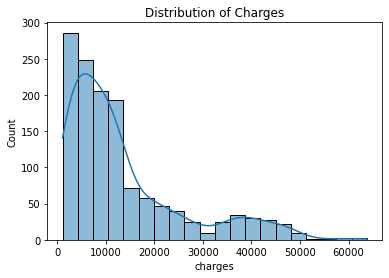

In [12]:
sns.histplot(data=df, x='charges', bins=20,kde=True)
plt.title('Distribution of Charges')

In [13]:
## Each column distribution 

<AxesSubplot:xlabel='sex', ylabel='count'>

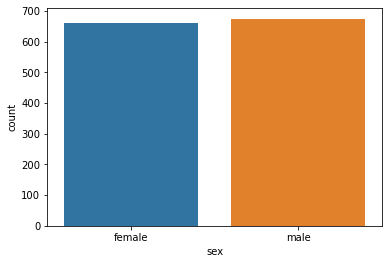

In [16]:
sns.countplot(data=df,x='sex')

<AxesSubplot:xlabel='children', ylabel='count'>

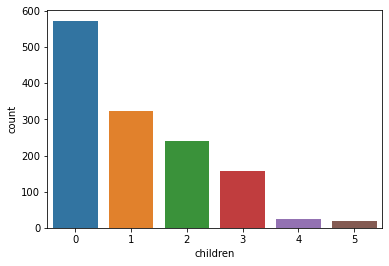

In [17]:
sns.countplot(data=df,x='children')

<AxesSubplot:xlabel='smoker', ylabel='count'>

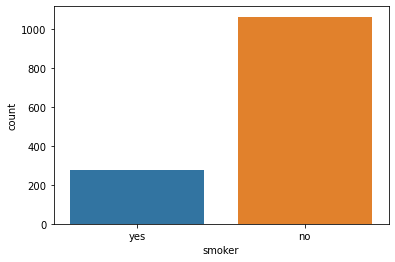

In [18]:
sns.countplot(data=df,x='smoker')

<AxesSubplot:xlabel='region', ylabel='count'>

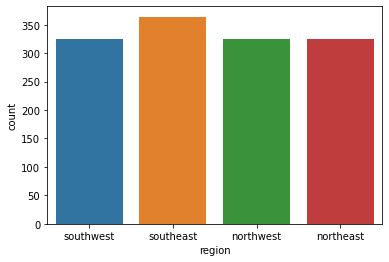

In [19]:
sns.countplot(data=df,x='region')

<AxesSubplot:xlabel='charges', ylabel='Count'>

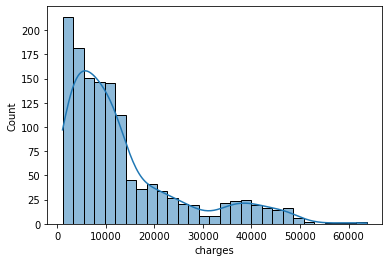

In [20]:
sns.histplot(data=df,x='charges',kde=True)

<AxesSubplot:xlabel='charges'>

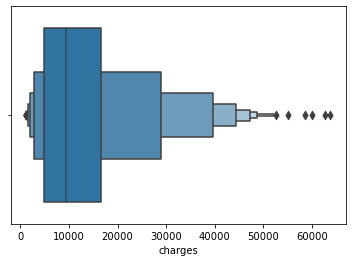

In [23]:
sns.boxenplot(data=df, x='charges')

<AxesSubplot:xlabel='charges', ylabel='Count'>

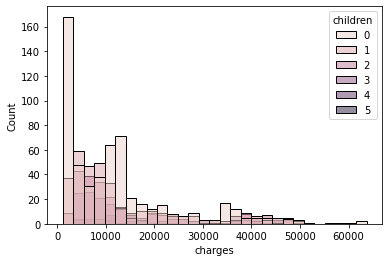

In [29]:
sns.histplot(data=df, x='charges', hue='children')

<AxesSubplot:xlabel='charges', ylabel='children'>

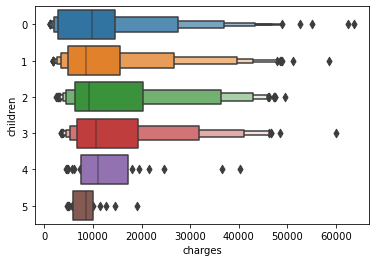

In [28]:
sns.boxenplot(data=df, x='charges',y='children',orient='h')

<AxesSubplot:xlabel='charges', ylabel='Count'>

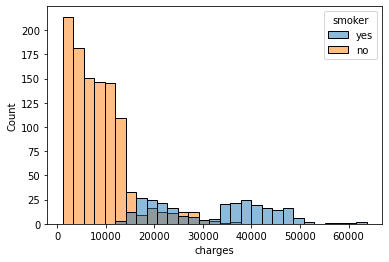

In [34]:
sns.histplot(data=df, x='charges', hue='smoker')

<AxesSubplot:xlabel='charges', ylabel='smoker'>

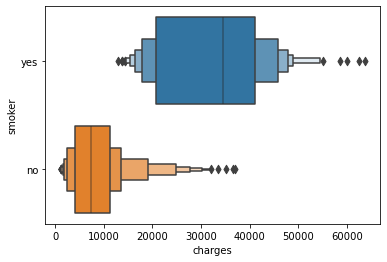

In [30]:
sns.boxenplot(data=df, x='charges',y='smoker',orient='h')

<AxesSubplot:xlabel='charges', ylabel='Count'>

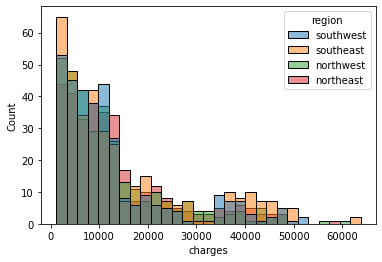

In [35]:
sns.histplot(data=df, x='charges', hue='region')

<AxesSubplot:xlabel='charges', ylabel='region'>

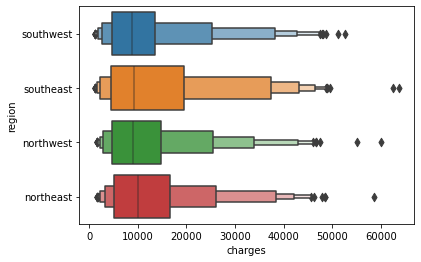

In [31]:
sns.boxenplot(data=df, x='charges',y='region',orient='h')

<AxesSubplot:xlabel='charges', ylabel='Count'>

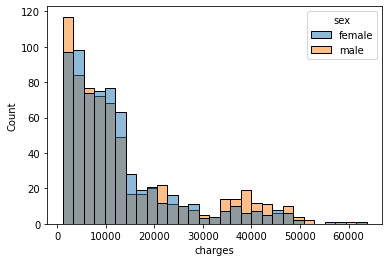

In [36]:
sns.histplot(data=df, x='charges', hue='sex')

<AxesSubplot:xlabel='charges', ylabel='sex'>

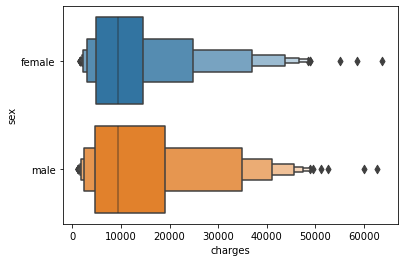

In [33]:
sns.boxenplot(data=df, x='charges',y='sex',orient='h')

In [ ]:
### CHARGES VS 

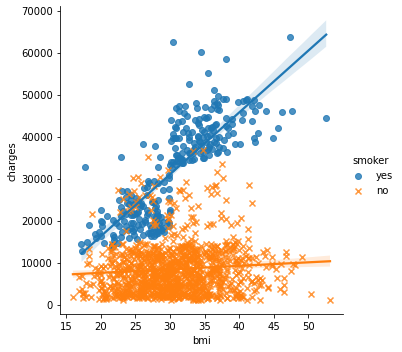

In [40]:
sns.lmplot(data=df,x='bmi',y='charges',hue='smoker',markers=['o','x'])